In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [31]:
df = gpd.read_file('./data/ddb_roundabout.geojson')

In [32]:
df

,timestamp,xacc,yacc,speed,maxspeed,lanecount,classification,index_right,distances,geometry
0,2020-12-17 01:46:30+00:00,-0.889,0.002,7,32,1,Braking,402.0,78.508285,POINT (16595825.835 -4208110.694)
1,2020-07-05 23:53:50+00:00,-0.864,0.000,3,48,1,Braking,70.0,27.548220,POINT (16597539.710 -4206559.210)
2,2020-07-05 23:53:50+00:00,-0.864,0.000,3,48,1,Braking,903.0,27.548220,POINT (16597539.710 -4206559.210)
3,2020-04-25 19:27:59+00:00,-0.346,0.714,27,45,1,Steering,70.0,4.927812,POINT (16597536.370 -4206536.837)
4,2020-04-25 19:27:59+00:00,-0.346,0.714,27,45,1,Steering,903.0,4.927812,POINT (16597536.370 -4206536.837)
...,...,...,...,...,...,...,...,...,...,...
2162,2022-12-28 23:44:27+00:00,-0.047,-0.533,27,27,1,Steering,540.0,0.027014,POINT (16605921.177 -4207828.813)
2163,2022-11-28 19:21:58+00:00,-0.114,-0.515,27,27,2,Steering,311.0,0.022832,POINT (16606336.621 -4208522.205)
2164,2022-11-18 23:11:06+00:00,-0.034,-0.526,24,24,1,Steering,540.0,0.008410,POINT (16605925.407 -4207808.075)
2165,2022-10-24 19:26:46+00:00,-0.022,0.520,27,27,1,Steering,311.0,5.510750,POINT (16606322.595 -4208557.817)


In [33]:
df = pd.DataFrame(df)
type(df)

pandas.core.frame.DataFrame

In [34]:
df['hour'] = df['timestamp'].dt.hour
df

,timestamp,xacc,yacc,speed,maxspeed,lanecount,classification,index_right,distances,geometry,hour
0,2020-12-17 01:46:30+00:00,-0.889,0.002,7,32,1,Braking,402.0,78.508285,POINT (16595825.835 -4208110.694),1
1,2020-07-05 23:53:50+00:00,-0.864,0.000,3,48,1,Braking,70.0,27.548220,POINT (16597539.710 -4206559.210),23
2,2020-07-05 23:53:50+00:00,-0.864,0.000,3,48,1,Braking,903.0,27.548220,POINT (16597539.710 -4206559.210),23
3,2020-04-25 19:27:59+00:00,-0.346,0.714,27,45,1,Steering,70.0,4.927812,POINT (16597536.370 -4206536.837),19
4,2020-04-25 19:27:59+00:00,-0.346,0.714,27,45,1,Steering,903.0,4.927812,POINT (16597536.370 -4206536.837),19
...,...,...,...,...,...,...,...,...,...,...,...
2162,2022-12-28 23:44:27+00:00,-0.047,-0.533,27,27,1,Steering,540.0,0.027014,POINT (16605921.177 -4207828.813),23
2163,2022-11-28 19:21:58+00:00,-0.114,-0.515,27,27,2,Steering,311.0,0.022832,POINT (16606336.621 -4208522.205),19
2164,2022-11-18 23:11:06+00:00,-0.034,-0.526,24,24,1,Steering,540.0,0.008410,POINT (16605925.407 -4207808.075),23
2165,2022-10-24 19:26:46+00:00,-0.022,0.520,27,27,1,Steering,311.0,5.510750,POINT (16606322.595 -4208557.817),19


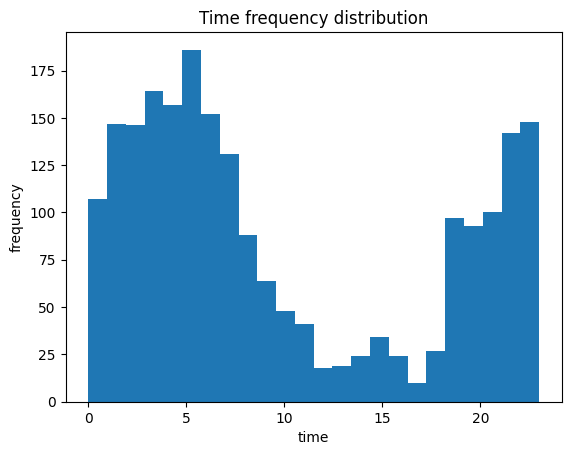

In [39]:
plt.hist(df['hour'], bins=24)
plt.title('Time frequency distribution')
plt.xlabel('time')
plt.ylabel('frequency')
plt.show()

In [45]:
brake = df[df['classification']=='Braking']

In [51]:
brake.describe()

,xacc,yacc,speed,maxspeed,lanecount,index_right,distances,hour
count,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000
mean,-0.677194,-0.003017,21.325095,51.800380,1.543726,384.306084,21.473235,9.735741
std,0.103504,0.091121,15.180903,15.174919,0.542471,263.217179,22.254654,7.966629
min,-1.962000,-0.380000,0.000000,21.000000,1.000000,4.000000,0.009108,0.000000
25%,-0.709750,-0.044000,10.000000,41.000000,1.000000,130.250000,7.548134,3.000000
50%,-0.655000,-0.003000,18.500000,51.000000,2.000000,353.500000,13.726475,7.000000
75%,-0.619000,0.027000,31.000000,61.000000,2.000000,600.250000,27.053881,20.000000
max,-0.444000,0.314000,87.000000,106.000000,3.000000,903.000000,98.211709,23.000000


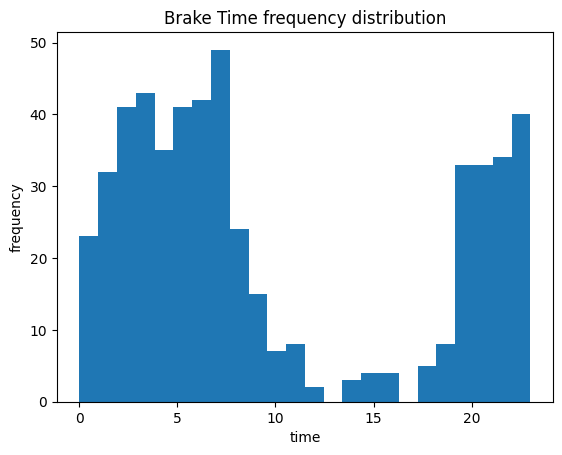

In [48]:
plt.hist(brake['hour'], bins=24)
plt.title('Brake Time frequency distribution')
plt.xlabel('time')
plt.ylabel('frequency')
plt.show()

In [47]:
steer = df[df['classification']=='Steering']

In [50]:
steer.describe()

,xacc,yacc,speed,maxspeed,lanecount,index_right,distances,hour
count,1641.000000,1641.000000,1641.000000,1641.000000,1641.000000,1641.000000,1641.000000,1641.000000
mean,-0.047164,0.391462,42.287629,48.270567,1.597197,371.555759,3.682705,9.803778
std,0.188491,0.494205,11.762441,13.646224,0.493091,278.001646,11.001271,7.816993
min,-0.578000,-1.096000,10.000000,22.000000,1.000000,4.000000,0.000139,0.000000
25%,-0.173000,0.559000,34.000000,39.000000,1.000000,97.000000,0.060771,3.000000
50%,-0.100000,0.614000,41.000000,46.000000,2.000000,325.000000,0.271747,7.000000
75%,0.088000,0.652000,48.000000,56.000000,2.000000,637.000000,0.876676,19.000000
max,1.116000,0.957000,97.000000,102.000000,3.000000,903.000000,97.257590,23.000000


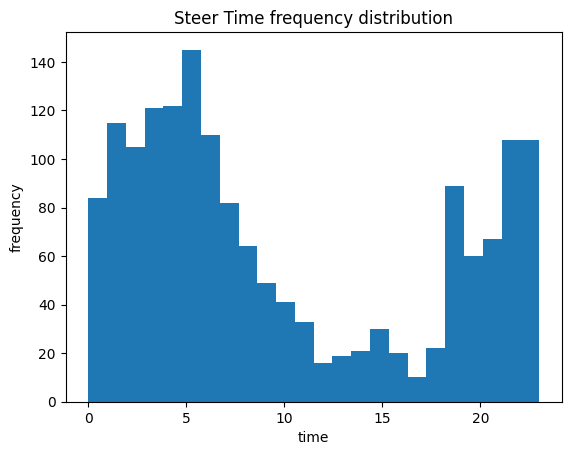

In [49]:
plt.hist(steer['hour'], bins=24)
plt.title('Steer Time frequency distribution')
plt.xlabel('time')
plt.ylabel('frequency')
plt.show()